In [99]:
%matplotlib inline

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc

import os
import random
import pickle

In [100]:
imgs = {}

# look inside each folder which represents the categories of our data
for fileName in ["base.jpg", "y0.jpg", "y1.jpg"]:
    img = misc.imread("/".join([imageFolder, fileName]))

    if image_dim == 1 and len(img.shape) > 2: 
        img = img[:,:,0]
        
    img = img / 255.0
    imgs[fileName] = img

print "Load data complete"

Load data complete


image dimensions: (1080, 1080)


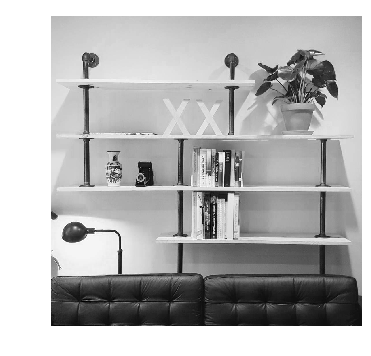

In [101]:
img = imgs["base.jpg"]
print "image dimensions:", img.shape

imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

In [102]:
import math

targetRes = 50

xStep = int( math.floor( float(img.shape[0]) / targetRes ) )
yStep = int( math.floor( float(img.shape[1]) / targetRes ) )

data = []

for y in range(yStep):
    for x in range(xStep):
        crop = imgs["base.jpg"][x * targetRes : (x + 1) * targetRes, y * targetRes : (y + 1) * targetRes]
        
        y0 = imgs["y0.jpg"][x * targetRes : (x + 1) * targetRes, y * targetRes : (y + 1) * targetRes]
        y0_val = int ( round( np.mean(y0) ) )
        
        y1 = imgs["y1.jpg"][x * targetRes : (x + 1) * targetRes, y * targetRes : (y + 1) * targetRes]
        y1_val = int ( round( np.mean(y1) ) )

        data.append([crop, y0_val, y1_val])

image dimensions: (50, 50)
Value at time 0: 1
Value at time 1: 1


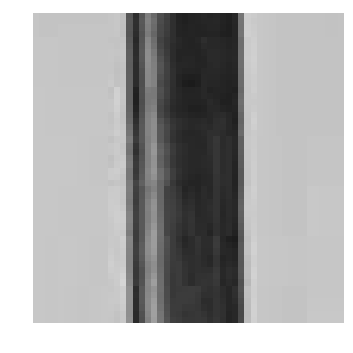

In [103]:
img_index = 52

img = data[img_index][0]
print "image dimensions:", img.shape
print "Value at time 0:", (data[img_index][1])
print "Value at time 1:", (data[img_index][2])

imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

Time 0


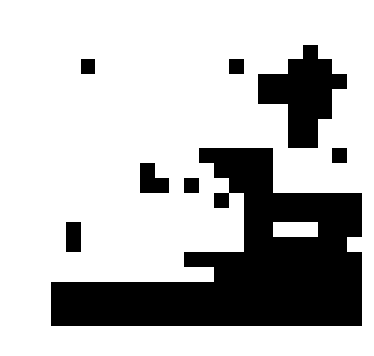

Time 1


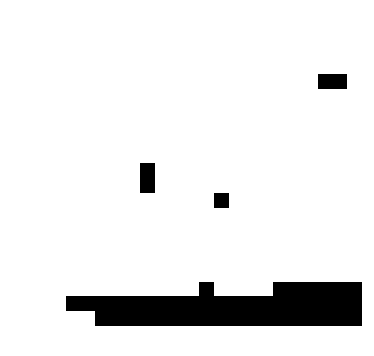

In [91]:
recomp_v0 = np.ndarray((targetRes * xStep, targetRes * yStep), dtype=np.float32)
recomp_v1 = np.ndarray((targetRes * xStep, targetRes * yStep), dtype=np.float32)

for y in range(yStep):
    for x in range(xStep):
        recomp_v0[x * targetRes : (x + 1) * targetRes, y * targetRes : (y + 1) * targetRes] = data[ y * xStep + x ][1]
        recomp_v1[x * targetRes : (x + 1) * targetRes, y * targetRes : (y + 1) * targetRes] = data[ y * xStep + x ][2]
        
print "Time 0"
imshow(recomp_v0, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

print "Time 1"
imshow(recomp_v1, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()